In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
from sklearn import preprocessing

In [2]:
from IPython.display import Image
%matplotlib inline
warnings.filterwarnings('ignore')

In [3]:
# Added version check for recent scikit-learn 0.18 checks
from distutils.version import LooseVersion as Version
from sklearn import __version__ as sklearn_version

In [4]:
df= pd.read_csv('D:\Semester\SEM 4\Emotion_features.csv')

In [5]:
df.head()

,id,song_name,class,label,tempo,total_beats,average_beats,chroma_stft_mean,chroma_stft_std,chroma_stft_var,...,zcr_var,harm_mean,harm_std,harm_var,perc_mean,perc_std,perc_var,frame_mean,frame_std,frame_var
0,1,30 seconds to Mars - Night of the Hunter.mp3,relax,3,117.453835,139925,1283.715596,0.422269,0.293326,0.086040,...,0.007792,0.000001,0.131658,0.017334,0.000142,0.095362,0.009094,4.221388,1.601396,2.564469
1,2,Absolutely - Story of A Girl.mp3,sad,1,129.199219,159877,1268.865079,0.425321,0.289704,0.083929,...,0.008534,-0.000003,0.169204,0.028630,0.000006,0.099145,0.009830,3.246150,1.885735,3.555996
2,3,Ace - Futureland.mp3,happy,2,99.384014,121594,1253.546392,0.487377,0.268670,0.072184,...,0.006199,0.000019,0.206916,0.042814,-0.000077,0.115425,0.013323,3.989188,1.766115,3.119163
3,4,Alan Walker - Faded.mp3,sad,1,89.102909,113611,1291.034091,0.292934,0.295695,0.087435,...,0.002483,-0.000020,0.184177,0.033921,-0.000003,0.055471,0.003077,3.423782,1.922333,3.695364
4,5,Alan Walker - Force [Instrumental].mp3,relax,3,198.768029,252770,1404.277778,0.286669,0.300049,0.090029,...,0.002977,0.000014,0.147811,0.021848,0.000307,0.048204,0.002324,9.637442,7.344525,53.942050


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 58 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   75 non-null     int64  
 1   song_name            75 non-null     object 
 2   class                75 non-null     object 
 3   label                75 non-null     int64  
 4   tempo                75 non-null     float64
 5   total_beats          75 non-null     int64  
 6   average_beats        75 non-null     float64
 7   chroma_stft_mean     75 non-null     float64
 8   chroma_stft_std      75 non-null     float64
 9   chroma_stft_var      75 non-null     float64
 10  chroma_cq_mean       75 non-null     float64
 11  chroma_cq_std        75 non-null     float64
 12  chroma_cq_var        75 non-null     float64
 13  chroma_cens_mean     75 non-null     float64
 14  chroma_cens_std      75 non-null     float64
 15  chroma_cens_var      75 non-null     float

In [7]:
df.corr(method='pearson')

,id,label,tempo,total_beats,average_beats,chroma_stft_mean,chroma_stft_std,chroma_stft_var,chroma_cq_mean,chroma_cq_std,...,zcr_var,harm_mean,harm_std,harm_var,perc_mean,perc_std,perc_var,frame_mean,frame_std,frame_var
id,1.000000,0.052084,0.034827,-0.028568,-0.087665,-0.008712,-0.132358,-0.135471,-0.152585,0.072819,...,-0.088232,-0.095602,-0.008848,0.018997,-0.080745,-0.092849,-0.069550,-0.104622,-0.149779,-0.135957
label,0.052084,1.000000,-0.014307,-0.020816,-0.005543,0.398708,-0.163186,-0.163213,0.368606,-0.325405,...,-0.103805,-0.025113,0.297069,0.327513,-0.020045,0.304244,0.265060,-0.202871,-0.169977,-0.133021
tempo,0.034827,-0.014307,1.000000,0.886780,0.106686,-0.055536,-0.004460,-0.002374,-0.217156,0.093405,...,-0.154859,0.021996,0.048261,0.051874,0.080526,-0.022131,0.006598,0.120735,0.170876,0.192223
total_beats,-0.028568,-0.020816,0.886780,1.000000,0.446919,-0.116691,0.077158,0.076525,-0.222841,0.148014,...,-0.166556,-0.014358,0.086461,0.067142,0.050127,-0.063723,-0.048996,0.140259,0.181655,0.159278
average_beats,-0.087665,-0.005543,0.106686,0.446919,1.000000,-0.153214,0.214094,0.209369,-0.097675,0.155601,...,-0.055985,-0.098009,0.094873,0.037507,-0.084737,-0.118294,-0.135051,0.323546,0.242427,0.134506
chroma_stft_mean,-0.008712,0.398708,-0.055536,-0.116691,-0.153214,1.000000,-0.557574,-0.552926,0.500291,-0.292764,...,0.080517,0.150060,0.402019,0.423315,0.128041,0.596058,0.556695,-0.197995,-0.229253,-0.185719
chroma_stft_std,-0.132358,-0.163186,-0.004460,0.077158,0.214094,-0.557574,1.000000,0.999573,0.039038,0.235718,...,0.167527,0.060666,-0.435096,-0.451206,0.027578,-0.166936,-0.104192,0.055556,0.058335,0.075023
chroma_stft_var,-0.135471,-0.163213,-0.002374,0.076525,0.209369,-0.552926,0.999573,1.000000,0.040721,0.235029,...,0.166462,0.059479,-0.436425,-0.451183,0.031523,-0.165086,-0.102507,0.051513,0.053851,0.071703
chroma_cq_mean,-0.152585,0.368606,-0.217156,-0.222841,-0.097675,0.500291,0.039038,0.040721,1.000000,-0.713601,...,0.256851,0.091068,-0.028536,-0.047060,0.082268,0.438935,0.409283,-0.172815,-0.242519,-0.214216
chroma_cq_std,0.072819,-0.325405,0.093405,0.148014,0.155601,-0.292764,0.235718,0.235029,-0.713601,1.000000,...,0.057890,0.026244,0.042159,0.060599,-0.023200,-0.141745,-0.095662,0.087158,0.158004,0.168948


In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
class1 = df['class']
scaler=StandardScaler()
scaler.fit(df.loc[:,'tempo':])

StandardScaler()

In [10]:
scaled_data=scaler.transform(df.loc[:,'tempo':])
scaled_data

array([[-0.03622421, -0.07112457,  0.25521458, ..., -0.02248644,
        -0.39478376, -0.34383075],
       [ 0.43008893,  0.5150095 ,  0.07953586, ..., -0.37780267,
        -0.21482131, -0.2740163 ],
       [-0.75362903, -0.60963819, -0.10168123, ..., -0.10708554,
        -0.29053034, -0.30477414],
       ...,
       [ 0.43008893,  0.57206004,  0.14223708, ..., -0.3088544 ,
         0.01330291, -0.16915465],
       [ 0.70005969,  0.91677221,  0.98459894, ..., -0.09481867,
        -0.11456055, -0.23018287],
       [ 0.43008893,  0.35951593, -0.18332145, ..., -0.07874484,
         0.00774531, -0.17192673]])

PCA

In [11]:
from sklearn.decomposition import PCA

In [12]:
pca=PCA(n_components=2)
pca.fit(scaled_data)

PCA(n_components=2)

In [13]:
x_pca=pca.transform(scaled_data)

In [14]:
x_pca

array([[-1.23917501e+00, -3.25818772e+00],
       [-2.79186872e+00, -1.52720500e+00],
       [-2.20876376e+00,  2.98903359e+00],
       [ 4.26422995e+00,  2.39597877e+00],
       [ 6.13724523e+00,  3.37089679e+00],
       [-4.10683110e+00, -1.97045103e-01],
       [ 3.49196572e+00,  1.96712712e+00],
       [-3.52969415e+00,  1.05558392e+00],
       [-3.45336461e+00, -7.63345450e-01],
       [-5.46049094e+00, -1.89606345e+00],
       [-5.00077207e+00, -3.87011937e-01],
       [-1.05913587e+00, -2.07217491e+00],
       [-3.73151196e+00, -1.01435717e+00],
       [ 3.21510262e+00, -5.54238128e+00],
       [ 5.42304065e+00, -8.22511656e-01],
       [-7.36344265e-01,  2.01591523e+00],
       [-4.95282871e+00,  2.58918222e+00],
       [-4.34778494e+00,  3.32669003e+00],
       [ 2.77708220e+00, -1.70939546e+00],
       [-6.99591784e+00, -1.27486569e+00],
       [-1.05653690e+00,  2.19061893e+00],
       [-7.21345363e-01,  3.36092534e+00],
       [-5.46921674e+00, -2.43653923e-01],
       [ 2.

In [15]:
array = np.array(x_pca)
column_values = ['x', 'y']
df2 = pd.DataFrame(data = array,columns = column_values)

In [16]:
df2['class']= class1
df2

,x,y,class
0,-1.239175,-3.258188,relax
1,-2.791869,-1.527205,sad
2,-2.208764,2.989034,happy
3,4.264230,2.395979,sad
4,6.137245,3.370897,relax
...,...,...,...
70,9.527548,-1.294451,sad
71,-5.616762,1.681947,sad
72,3.173690,7.685617,relax
73,0.098534,0.329182,angry


In [17]:
if Version(sklearn_version) < '0.18':
    from sklearn.cross_validation import train_test_split
else:
    from sklearn.model_selection import train_test_split
X=df2.drop('class',axis=1)
y=df2['class']

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, random_state=0)

Models

In [18]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [19]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [20]:
pred1 = logmodel.predict(X_test)
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

       angry       0.20      0.33      0.25         3
       happy       0.50      0.44      0.47         9
       relax       0.00      0.00      0.00         3
         sad       0.70      0.88      0.78         8

    accuracy                           0.52        23
   macro avg       0.35      0.41      0.37        23
weighted avg       0.47      0.52      0.49        23



In [21]:
pred_proba1 = logmodel.predict_proba(X_test)
auc1 = roc_auc_score(y_test,pred_proba1,multi_class='ovo')
auc1

0.675925925925926

MLP

In [22]:
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=1000, activation = 'logistic',random_state=7)
mlp

MLPClassifier(activation='logistic', hidden_layer_sizes=(150, 100, 50),
              max_iter=1000, random_state=7)

In [23]:
mlp.fit(X_train,y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(150, 100, 50),
              max_iter=1000, random_state=7)

In [24]:
pred2 = mlp.predict(X_test)

In [25]:
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

       angry       0.29      0.67      0.40         3
       happy       0.50      0.22      0.31         9
       relax       0.00      0.00      0.00         3
         sad       0.78      0.88      0.82         8

    accuracy                           0.48        23
   macro avg       0.39      0.44      0.38        23
weighted avg       0.50      0.48      0.46        23



In [26]:
pred_proba2 = mlp.predict_proba(X_test)
auc2 = roc_auc_score(y_test,pred_proba2,multi_class='ovo')
auc2

0.6215277777777778

SVM

In [27]:
from sklearn.svm import SVC
model = SVC(probability=True)
model.fit(X_train,y_train)

SVC(probability=True)

In [28]:
pred3 = model.predict(X_test)
print(classification_report(y_test,pred3))

              precision    recall  f1-score   support

       angry       0.25      0.67      0.36         3
       happy       0.80      0.44      0.57         9
       relax       0.00      0.00      0.00         3
         sad       0.78      0.88      0.82         8

    accuracy                           0.57        23
   macro avg       0.46      0.50      0.44        23
weighted avg       0.62      0.57      0.56        23



In [29]:
pred_proba3 = model.predict_proba(X_test)
auc3 = roc_auc_score(y_test,pred_proba3,multi_class='ovo')
auc3

0.7623456790123457

Grid Search

In [30]:
from sklearn.model_selection import GridSearchCV

In [31]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
grid1 = GridSearchCV(SVC(probability=True),param_grid,refit=True,verbose=2)
grid1.fit(X_train,y_train)


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.0

[CV] END ........................C=1000, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=1000, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=1000, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .....................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .....................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .....................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .....................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ...................

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=2)

In [32]:
grid1.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [33]:
grid1.best_estimator_

SVC(C=1, gamma=0.1, probability=True)

In [34]:
pred4 = grid1.predict(X_test)

In [35]:
print(classification_report(y_test,pred4))

              precision    recall  f1-score   support

       angry       0.25      0.67      0.36         3
       happy       0.80      0.44      0.57         9
       relax       0.00      0.00      0.00         3
         sad       0.78      0.88      0.82         8

    accuracy                           0.57        23
   macro avg       0.46      0.50      0.44        23
weighted avg       0.62      0.57      0.56        23



In [36]:
pred_proba4 = grid1.predict_proba(X_test)
auc4 = roc_auc_score(y_test,pred_proba4,multi_class='ovo')
auc4

0.6531635802469136

Linear Kernel 

In [38]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['linear']} 
grid2 = GridSearchCV(SVC(probability=True),param_grid,refit=True,verbose=2)
grid2.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.01, 

[CV] END .....................C=1000, gamma=1, kernel=linear; total time=   2.7s
[CV] END .....................C=1000, gamma=1, kernel=linear; total time=   6.6s
[CV] END .....................C=1000, gamma=1, kernel=linear; total time=   0.5s
[CV] END .....................C=1000, gamma=1, kernel=linear; total time=   2.1s
[CV] END ...................C=1000, gamma=0.1, kernel=linear; total time=   3.3s
[CV] END ...................C=1000, gamma=0.1, kernel=linear; total time=   1.9s
[CV] END ...................C=1000, gamma=0.1, kernel=linear; total time=   8.3s
[CV] END ...................C=1000, gamma=0.1, kernel=linear; total time=   1.2s
[CV] END ...................C=1000, gamma=0.1, kernel=linear; total time=   1.9s
[CV] END ..................C=1000, gamma=0.01, kernel=linear; total time=   2.5s
[CV] END ..................C=1000, gamma=0.01, kernel=linear; total time=   3.1s
[CV] END ..................C=1000, gamma=0.01, kernel=linear; total time=   7.4s
[CV] END ..................C

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=2)

In [39]:
grid2.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'linear'}

In [40]:
grid2.best_estimator_

SVC(C=1, gamma=1, kernel='linear', probability=True)

In [42]:
pred5 = grid2.predict(X_test)
print(classification_report(y_test,pred5))


              precision    recall  f1-score   support

       angry       0.20      0.67      0.31         3
       happy       0.60      0.33      0.43         9
       relax       0.00      0.00      0.00         3
         sad       0.88      0.88      0.88         8

    accuracy                           0.52        23
   macro avg       0.42      0.47      0.40        23
weighted avg       0.57      0.52      0.51        23



In [43]:
pred_proba5 = grid2.predict_proba(X_test)
auc5 = roc_auc_score(y_test,pred_proba5,multi_class='ovo')
auc5

0.6315586419753086

Polynomial Kernel

In [44]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['poly']} 
grid3 = GridSearchCV(SVC(probability=True),param_grid,refit=True,verbose=2)
grid3.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.01

[CV] END .......................C=1000, gamma=1, kernel=poly; total time= 2.2min
[CV] END .......................C=1000, gamma=1, kernel=poly; total time= 2.7min
[CV] END .......................C=1000, gamma=1, kernel=poly; total time= 4.2min
[CV] END .......................C=1000, gamma=1, kernel=poly; total time= 2.3min
[CV] END .....................C=1000, gamma=0.1, kernel=poly; total time=   0.8s
[CV] END .....................C=1000, gamma=0.1, kernel=poly; total time=   0.1s
[CV] END .....................C=1000, gamma=0.1, kernel=poly; total time=   0.2s
[CV] END .....................C=1000, gamma=0.1, kernel=poly; total time=   0.3s
[CV] END .....................C=1000, gamma=0.1, kernel=poly; total time=   0.3s
[CV] END ....................C=1000, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ....................C=1000, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ....................C=1000, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ...................

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['poly']},
             verbose=2)

In [45]:
grid3.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'poly'}

In [46]:
grid3.best_estimator_

SVC(C=1, gamma=0.1, kernel='poly', probability=True)

In [47]:
pred6 = grid3.predict(X_test)
print(classification_report(y_test,pred6))

              precision    recall  f1-score   support

       angry       0.22      0.67      0.33         3
       happy       0.67      0.44      0.53         9
       relax       0.00      0.00      0.00         3
         sad       0.88      0.88      0.88         8

    accuracy                           0.57        23
   macro avg       0.44      0.50      0.44        23
weighted avg       0.59      0.57      0.56        23



In [48]:
pred_proba6 = grid3.predict_proba(X_test)
auc6 = roc_auc_score(y_test,pred_proba6,multi_class='ovo')
auc6

0.6284722222222222

Ensemble

bagging

In [49]:
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
bg = BaggingClassifier(DecisionTreeClassifier(),max_samples = 0.8, n_estimators = 25, random_state = 11)
bg.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.8,
                  n_estimators=25, random_state=11)

In [50]:
pred7 = bg.predict(X_test)
print(classification_report(y_test,pred7))

              precision    recall  f1-score   support

       angry       0.20      0.33      0.25         3
       happy       0.67      0.44      0.53         9
       relax       0.00      0.00      0.00         3
         sad       0.70      0.88      0.78         8

    accuracy                           0.52        23
   macro avg       0.39      0.41      0.39        23
weighted avg       0.53      0.52      0.51        23



In [51]:
pred_proba7 = bg.predict_proba(X_test)
auc7 = roc_auc_score(y_test,pred_proba7,multi_class='ovo')
auc7

0.5470679012345678

Adaboost

In [52]:
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier(DecisionTreeClassifier(), n_estimators = 25, learning_rate =1)
adb.fit(X_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), learning_rate=1,
                   n_estimators=25)

In [53]:
pred8 = adb.predict(X_test)
print(classification_report(y_test,pred8))

              precision    recall  f1-score   support

       angry       0.33      0.33      0.33         3
       happy       0.67      0.44      0.53         9
       relax       0.00      0.00      0.00         3
         sad       0.67      1.00      0.80         8

    accuracy                           0.57        23
   macro avg       0.42      0.44      0.42        23
weighted avg       0.54      0.57      0.53        23



In [54]:
pred_proba8 = adb.predict_proba(X_test)
auc8 = roc_auc_score(y_test,pred_proba8,multi_class='ovo')
auc8

0.6296296296296297

Random Forest

In [55]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=25, random_state = 25)
rfc.fit(X_train,y_train)

pred9 = rfc.predict(X_test)
print(classification_report(y_test,pred9))

              precision    recall  f1-score   support

       angry       0.17      0.33      0.22         3
       happy       1.00      0.33      0.50         9
       relax       0.00      0.00      0.00         3
         sad       0.64      0.88      0.74         8

    accuracy                           0.48        23
   macro avg       0.45      0.39      0.36        23
weighted avg       0.63      0.48      0.48        23



In [56]:
pred_proba9 = rfc.predict_proba(X_test)
auc9 = roc_auc_score(y_test,pred_proba9,multi_class='ovo')
auc9

0.6219135802469136

Compare

In [57]:
from sklearn.metrics import accuracy_score
scores = [round(accuracy_score(pred1,y_test)*100,2),round(accuracy_score(pred2,y_test)*100,2),round(accuracy_score(pred3,y_test)*100,2),round(accuracy_score(pred4,y_test)*100,2),round(accuracy_score(pred5,y_test)*100,2),round(accuracy_score(pred6,y_test)*100,2),round(accuracy_score(pred7,y_test)*100,2),round(accuracy_score(pred8,y_test)*100,2),round(accuracy_score(pred9,y_test)*100,2)]
models = ['Logistic','MLP','SVM- Def','SVM - rbf','SVM - linear','SVM - poly','Bagging','Adaboost','Random Forest']

<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy score'>

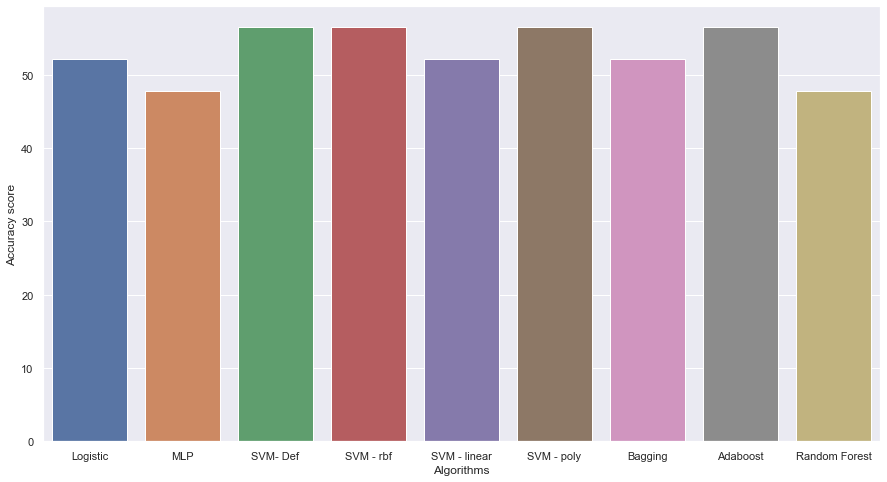

In [58]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")
sns.barplot(models,scores)

In [59]:
print(pd.DataFrame(scores,models))

                   0
Logistic       52.17
MLP            47.83
SVM- Def       56.52
SVM - rbf      56.52
SVM - linear   52.17
SVM - poly     56.52
Bagging        52.17
Adaboost       56.52
Random Forest  47.83


Predict

In [62]:
dfp = pd.read_csv('Emotion_Features_extract.csv')

In [63]:
dfp.head()

,Unnamed: 0,song_name,tempo,total_beats,average_beats,chroma_stft_mean,chroma_stft_std,chroma_stft_var,chroma_cq_mean,chroma_cq_std,...,zcr_var,harm_mean,harm_std,harm_var,perc_mean,perc_std,perc_var,frame_mean,frame_std,frame_var
0,1,2U.mp3,143.554688,181528,1287.432624,0.337507,0.297164,0.088306,0.378381,0.262614,...,0.005197,0.000005,0.195518,0.038227,0.000047,0.087004,0.007570,3.503891,1.884495,3.551321
1,2,Adele - Hello.mp3,172.265625,198026,1692.529915,0.592441,0.260705,0.067967,0.647986,0.222002,...,0.003062,-0.000176,0.007754,0.000060,-0.000293,0.009900,0.000098,31.933243,10.268238,105.436712
2,3,Alan Walker - Darkside (feat. AuRa and Tomine ...,86.132812,108798,1279.976471,0.298282,0.300772,0.090464,0.340307,0.288041,...,0.004128,-0.000010,0.173936,0.030254,-0.000036,0.073001,0.005329,7.303837,3.918483,15.354511
3,4,Alan Walker - Diamond Heart (feat. Sophia Soma...,89.102909,109606,1336.658537,0.283401,0.298075,0.088849,0.346237,0.278222,...,0.002587,0.000002,0.125562,0.015766,-0.000021,0.051719,0.002675,6.856853,1.921037,3.690383
4,5,Alan Walker - Different World feat. Sofia Cars...,129.199219,163991,1281.179688,0.366581,0.294307,0.086616,0.391032,0.295567,...,0.005414,-0.000030,0.183346,0.033616,0.000082,0.106256,0.011290,7.022875,3.666264,13.441495


In [64]:
scaler=StandardScaler()
scaler.fit(dfp.loc[:,'tempo':])

StandardScaler()

In [65]:
scaled_data2=scaler.transform(dfp.loc[:,'tempo':])
scaled_data2

array([[ 0.82656037,  0.97360054, -0.23528736, ..., -0.60224227,
        -0.64476858, -0.46551699],
       [ 1.88775143,  1.47399588,  3.81203065, ...,  5.86655696,
         5.10844427,  6.77830544],
       [-1.29582174, -1.23234886, -0.30978162, ...,  0.26239529,
         0.75102417,  0.3736633 ],
       ...,
       [ 0.82656037,  0.95045824, -0.19786168, ..., -0.57265492,
        -0.9034135 , -0.55641495],
       [-1.06842365, -1.02907273, -0.41714168, ..., -0.72878104,
        -0.7026317 , -0.48760639],
       [-0.49992844, -0.58909608, -0.60869947, ..., -0.30610457,
        -0.02117591, -0.16330104]])

In [66]:
pca=PCA(n_components=2)
pca.fit(scaled_data2)

PCA(n_components=2)

In [67]:
x_pca2=pca.transform(scaled_data2)
x_pca2

array([[-1.16113836,  0.07885201],
       [14.33939904, 11.81303075],
       [ 0.6222123 , -3.03591076],
       [ 3.01087367, -2.47727697],
       [-1.42002815, -1.64762755],
       [-3.04018944, -0.72259269],
       [-0.09856868, -2.08670758],
       [-3.96191242, -2.86255891],
       [-1.83972263,  0.09209525],
       [-0.10192455, -1.30720757],
       [-5.85021202,  1.37711636],
       [ 0.24783456,  1.4700913 ],
       [ 4.71669795,  1.2112802 ],
       [-2.32915125, -3.78417211],
       [-0.48029961, -0.21413977],
       [-5.67368974,  1.91399821],
       [ 1.68165822,  3.95932971],
       [-1.83992002,  1.57199123],
       [ 6.76482135, -2.17759512],
       [-0.4177107 ,  2.57062997],
       [ 4.03557695,  2.78873451],
       [ 5.81107303,  8.28553637],
       [-3.24014636, -0.02402064],
       [ 3.84635899, -3.38624108],
       [ 4.31008809,  0.68630314],
       [ 0.90199568, -1.24374511],
       [-1.42125383, -0.30483395],
       [ 2.23271286, -3.2806519 ],
       [ 6.98794963,

In [68]:
array = np.array(x_pca2)
column_values = ['x', 'y']
df3 = pd.DataFrame(data = array,columns = column_values)

Apply Models

In [69]:
df3

,x,y
0,-1.161138,0.078852
1,14.339399,11.813031
2,0.622212,-3.035911
3,3.010874,-2.477277
4,-1.420028,-1.647628
...,...,...
65,-8.490491,2.843922
66,-0.989292,-2.572164
67,-1.863007,-1.371811
68,-3.384213,1.515563


In [70]:
bg_pre = bg.predict(df3)

In [71]:
bg_pre

array(['happy', 'relax', 'relax', 'sad', 'sad', 'happy', 'happy', 'happy',
       'happy', 'angry', 'sad', 'sad', 'sad', 'happy', 'angry', 'sad',
       'sad', 'happy', 'relax', 'happy', 'sad', 'relax', 'happy', 'sad',
       'sad', 'angry', 'happy', 'sad', 'relax', 'angry', 'angry', 'happy',
       'angry', 'angry', 'angry', 'sad', 'sad', 'happy', 'relax', 'sad',
       'happy', 'sad', 'relax', 'relax', 'angry', 'relax', 'happy',
       'happy', 'happy', 'happy', 'angry', 'sad', 'happy', 'relax',
       'happy', 'sad', 'angry', 'angry', 'sad', 'happy', 'relax', 'happy',
       'angry', 'happy', 'happy', 'angry', 'happy', 'happy', 'happy',
       'happy'], dtype=object)

In [72]:
songs = dfp['song_name']
chars = dfp.loc[:,'tempo':]
bg_final = pd.concat([songs,pd.DataFrame(bg_pre,columns=['class']),chars],axis=1)


In [73]:
bg_final

,song_name,class,tempo,total_beats,average_beats,chroma_stft_mean,chroma_stft_std,chroma_stft_var,chroma_cq_mean,chroma_cq_std,...,zcr_var,harm_mean,harm_std,harm_var,perc_mean,perc_std,perc_var,frame_mean,frame_std,frame_var
0,2U.mp3,happy,143.554688,181528,1287.432624,0.337507,0.297164,0.088306,0.378381,0.262614,...,0.005197,0.000005,0.195518,0.038227,0.000047,0.087004,0.007570,3.503891,1.884495,3.551321
1,Adele - Hello.mp3,relax,172.265625,198026,1692.529915,0.592441,0.260705,0.067967,0.647986,0.222002,...,0.003062,-0.000176,0.007754,0.000060,-0.000293,0.009900,0.000098,31.933243,10.268238,105.436712
2,Alan Walker - Darkside (feat. AuRa and Tomine ...,relax,86.132812,108798,1279.976471,0.298282,0.300772,0.090464,0.340307,0.288041,...,0.004128,-0.000010,0.173936,0.030254,-0.000036,0.073001,0.005329,7.303837,3.918483,15.354511
3,Alan Walker - Diamond Heart (feat. Sophia Soma...,sad,89.102909,109606,1336.658537,0.283401,0.298075,0.088849,0.346237,0.278222,...,0.002587,0.000002,0.125562,0.015766,-0.000021,0.051719,0.002675,6.856853,1.921037,3.690383
4,Alan Walker - Different World feat. Sofia Cars...,sad,129.199219,163991,1281.179688,0.366581,0.294307,0.086616,0.391032,0.295567,...,0.005414,-0.000030,0.183346,0.033616,0.000082,0.106256,0.011290,7.022875,3.666264,13.441495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,Wow.mp3,angry,99.384014,125525,1494.345238,0.400022,0.327945,0.107548,0.402793,0.273378,...,0.003059,0.000043,0.319199,0.101888,-0.000436,0.140654,0.019784,3.875410,2.317032,5.368635
66,XXXTENTACION & Lil Pump - Arms Around You (Lyr...,happy,143.554688,182851,1287.683099,0.373766,0.293780,0.086307,0.351260,0.288830,...,0.003150,0.000012,0.183886,0.033814,-0.000023,0.104258,0.010870,6.604916,2.706290,7.324007
67,Zara Larsson - Ain't My Fault (Official Video)...,happy,143.554688,180765,1291.178571,0.396478,0.299334,0.089601,0.379690,0.295526,...,0.010603,0.000007,0.210587,0.044347,-0.000013,0.082497,0.006806,3.633923,1.507590,2.272829
68,ZAYN - Rainberry (Lyric Video).mp3,happy,92.285156,115500,1269.230769,0.340810,0.322370,0.103922,0.418546,0.277732,...,0.002426,-0.000009,0.238526,0.056895,-0.000207,0.111929,0.012528,2.947773,1.800175,3.240631


<AxesSubplot:xlabel='class', ylabel='count'>

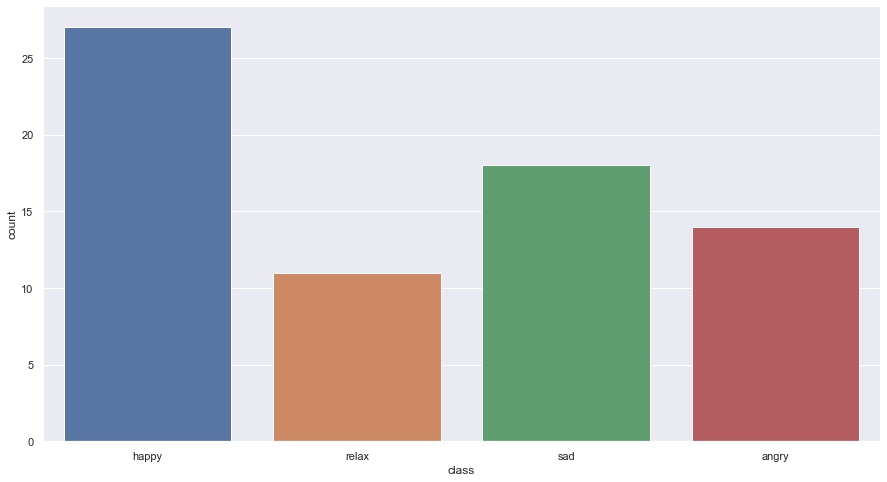

In [74]:
count = bg_final['class']
sns.countplot(count)

SVM predict

In [75]:
model_pre= model.predict(df3)
svm_final = pd.concat([songs,pd.DataFrame(model_pre,columns=['class']),chars],axis=1)
svm_final

,song_name,class,tempo,total_beats,average_beats,chroma_stft_mean,chroma_stft_std,chroma_stft_var,chroma_cq_mean,chroma_cq_std,...,zcr_var,harm_mean,harm_std,harm_var,perc_mean,perc_std,perc_var,frame_mean,frame_std,frame_var
0,2U.mp3,happy,143.554688,181528,1287.432624,0.337507,0.297164,0.088306,0.378381,0.262614,...,0.005197,0.000005,0.195518,0.038227,0.000047,0.087004,0.007570,3.503891,1.884495,3.551321
1,Adele - Hello.mp3,sad,172.265625,198026,1692.529915,0.592441,0.260705,0.067967,0.647986,0.222002,...,0.003062,-0.000176,0.007754,0.000060,-0.000293,0.009900,0.000098,31.933243,10.268238,105.436712
2,Alan Walker - Darkside (feat. AuRa and Tomine ...,happy,86.132812,108798,1279.976471,0.298282,0.300772,0.090464,0.340307,0.288041,...,0.004128,-0.000010,0.173936,0.030254,-0.000036,0.073001,0.005329,7.303837,3.918483,15.354511
3,Alan Walker - Diamond Heart (feat. Sophia Soma...,sad,89.102909,109606,1336.658537,0.283401,0.298075,0.088849,0.346237,0.278222,...,0.002587,0.000002,0.125562,0.015766,-0.000021,0.051719,0.002675,6.856853,1.921037,3.690383
4,Alan Walker - Different World feat. Sofia Cars...,happy,129.199219,163991,1281.179688,0.366581,0.294307,0.086616,0.391032,0.295567,...,0.005414,-0.000030,0.183346,0.033616,0.000082,0.106256,0.011290,7.022875,3.666264,13.441495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,Wow.mp3,angry,99.384014,125525,1494.345238,0.400022,0.327945,0.107548,0.402793,0.273378,...,0.003059,0.000043,0.319199,0.101888,-0.000436,0.140654,0.019784,3.875410,2.317032,5.368635
66,XXXTENTACION & Lil Pump - Arms Around You (Lyr...,happy,143.554688,182851,1287.683099,0.373766,0.293780,0.086307,0.351260,0.288830,...,0.003150,0.000012,0.183886,0.033814,-0.000023,0.104258,0.010870,6.604916,2.706290,7.324007
67,Zara Larsson - Ain't My Fault (Official Video)...,happy,143.554688,180765,1291.178571,0.396478,0.299334,0.089601,0.379690,0.295526,...,0.010603,0.000007,0.210587,0.044347,-0.000013,0.082497,0.006806,3.633923,1.507590,2.272829
68,ZAYN - Rainberry (Lyric Video).mp3,angry,92.285156,115500,1269.230769,0.340810,0.322370,0.103922,0.418546,0.277732,...,0.002426,-0.000009,0.238526,0.056895,-0.000207,0.111929,0.012528,2.947773,1.800175,3.240631


<AxesSubplot:xlabel='class', ylabel='count'>

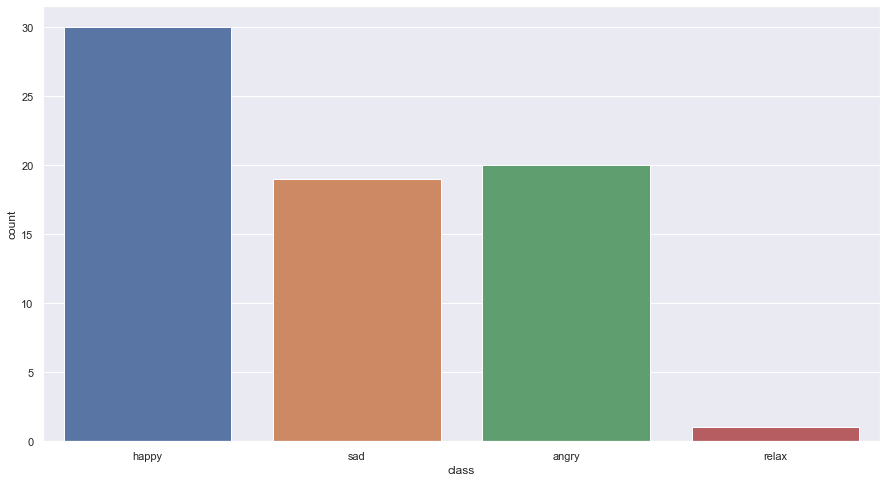

In [76]:
count2= svm_final['class']
sns.countplot(count2)

rbf

In [77]:
grid1_pre= grid1.predict(df3)
rbf_final = pd.concat([songs,pd.DataFrame(grid1_pre,columns=['class']),chars],axis=1)
rbf_final

,song_name,class,tempo,total_beats,average_beats,chroma_stft_mean,chroma_stft_std,chroma_stft_var,chroma_cq_mean,chroma_cq_std,...,zcr_var,harm_mean,harm_std,harm_var,perc_mean,perc_std,perc_var,frame_mean,frame_std,frame_var
0,2U.mp3,happy,143.554688,181528,1287.432624,0.337507,0.297164,0.088306,0.378381,0.262614,...,0.005197,0.000005,0.195518,0.038227,0.000047,0.087004,0.007570,3.503891,1.884495,3.551321
1,Adele - Hello.mp3,sad,172.265625,198026,1692.529915,0.592441,0.260705,0.067967,0.647986,0.222002,...,0.003062,-0.000176,0.007754,0.000060,-0.000293,0.009900,0.000098,31.933243,10.268238,105.436712
2,Alan Walker - Darkside (feat. AuRa and Tomine ...,happy,86.132812,108798,1279.976471,0.298282,0.300772,0.090464,0.340307,0.288041,...,0.004128,-0.000010,0.173936,0.030254,-0.000036,0.073001,0.005329,7.303837,3.918483,15.354511
3,Alan Walker - Diamond Heart (feat. Sophia Soma...,sad,89.102909,109606,1336.658537,0.283401,0.298075,0.088849,0.346237,0.278222,...,0.002587,0.000002,0.125562,0.015766,-0.000021,0.051719,0.002675,6.856853,1.921037,3.690383
4,Alan Walker - Different World feat. Sofia Cars...,happy,129.199219,163991,1281.179688,0.366581,0.294307,0.086616,0.391032,0.295567,...,0.005414,-0.000030,0.183346,0.033616,0.000082,0.106256,0.011290,7.022875,3.666264,13.441495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,Wow.mp3,angry,99.384014,125525,1494.345238,0.400022,0.327945,0.107548,0.402793,0.273378,...,0.003059,0.000043,0.319199,0.101888,-0.000436,0.140654,0.019784,3.875410,2.317032,5.368635
66,XXXTENTACION & Lil Pump - Arms Around You (Lyr...,happy,143.554688,182851,1287.683099,0.373766,0.293780,0.086307,0.351260,0.288830,...,0.003150,0.000012,0.183886,0.033814,-0.000023,0.104258,0.010870,6.604916,2.706290,7.324007
67,Zara Larsson - Ain't My Fault (Official Video)...,happy,143.554688,180765,1291.178571,0.396478,0.299334,0.089601,0.379690,0.295526,...,0.010603,0.000007,0.210587,0.044347,-0.000013,0.082497,0.006806,3.633923,1.507590,2.272829
68,ZAYN - Rainberry (Lyric Video).mp3,angry,92.285156,115500,1269.230769,0.340810,0.322370,0.103922,0.418546,0.277732,...,0.002426,-0.000009,0.238526,0.056895,-0.000207,0.111929,0.012528,2.947773,1.800175,3.240631


<AxesSubplot:xlabel='class', ylabel='count'>

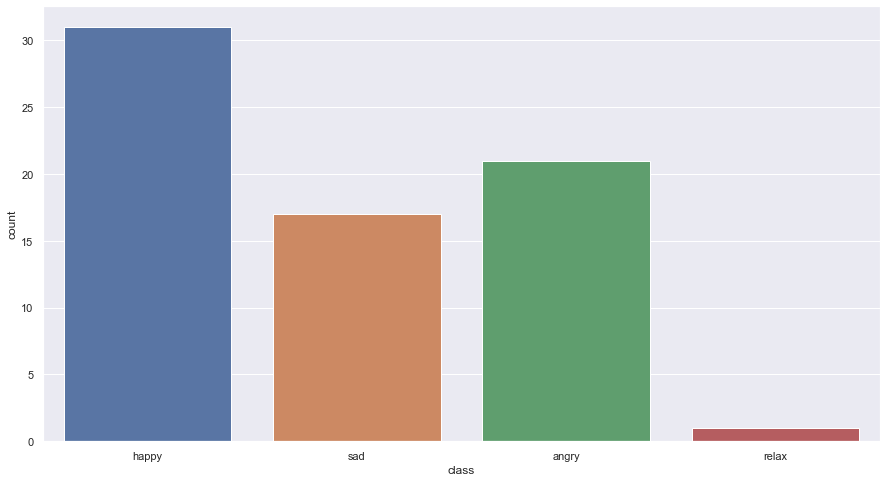

In [78]:
count3= rbf_final['class']
sns.countplot(count3)

Adboost

In [79]:
adb_pre= adb.predict(df3)
adb_final = pd.concat([songs,pd.DataFrame(grid1_pre,columns=['class']),chars],axis=1)
adb_final

,song_name,class,tempo,total_beats,average_beats,chroma_stft_mean,chroma_stft_std,chroma_stft_var,chroma_cq_mean,chroma_cq_std,...,zcr_var,harm_mean,harm_std,harm_var,perc_mean,perc_std,perc_var,frame_mean,frame_std,frame_var
0,2U.mp3,happy,143.554688,181528,1287.432624,0.337507,0.297164,0.088306,0.378381,0.262614,...,0.005197,0.000005,0.195518,0.038227,0.000047,0.087004,0.007570,3.503891,1.884495,3.551321
1,Adele - Hello.mp3,sad,172.265625,198026,1692.529915,0.592441,0.260705,0.067967,0.647986,0.222002,...,0.003062,-0.000176,0.007754,0.000060,-0.000293,0.009900,0.000098,31.933243,10.268238,105.436712
2,Alan Walker - Darkside (feat. AuRa and Tomine ...,happy,86.132812,108798,1279.976471,0.298282,0.300772,0.090464,0.340307,0.288041,...,0.004128,-0.000010,0.173936,0.030254,-0.000036,0.073001,0.005329,7.303837,3.918483,15.354511
3,Alan Walker - Diamond Heart (feat. Sophia Soma...,sad,89.102909,109606,1336.658537,0.283401,0.298075,0.088849,0.346237,0.278222,...,0.002587,0.000002,0.125562,0.015766,-0.000021,0.051719,0.002675,6.856853,1.921037,3.690383
4,Alan Walker - Different World feat. Sofia Cars...,happy,129.199219,163991,1281.179688,0.366581,0.294307,0.086616,0.391032,0.295567,...,0.005414,-0.000030,0.183346,0.033616,0.000082,0.106256,0.011290,7.022875,3.666264,13.441495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,Wow.mp3,angry,99.384014,125525,1494.345238,0.400022,0.327945,0.107548,0.402793,0.273378,...,0.003059,0.000043,0.319199,0.101888,-0.000436,0.140654,0.019784,3.875410,2.317032,5.368635
66,XXXTENTACION & Lil Pump - Arms Around You (Lyr...,happy,143.554688,182851,1287.683099,0.373766,0.293780,0.086307,0.351260,0.288830,...,0.003150,0.000012,0.183886,0.033814,-0.000023,0.104258,0.010870,6.604916,2.706290,7.324007
67,Zara Larsson - Ain't My Fault (Official Video)...,happy,143.554688,180765,1291.178571,0.396478,0.299334,0.089601,0.379690,0.295526,...,0.010603,0.000007,0.210587,0.044347,-0.000013,0.082497,0.006806,3.633923,1.507590,2.272829
68,ZAYN - Rainberry (Lyric Video).mp3,angry,92.285156,115500,1269.230769,0.340810,0.322370,0.103922,0.418546,0.277732,...,0.002426,-0.000009,0.238526,0.056895,-0.000207,0.111929,0.012528,2.947773,1.800175,3.240631


<AxesSubplot:xlabel='class', ylabel='count'>

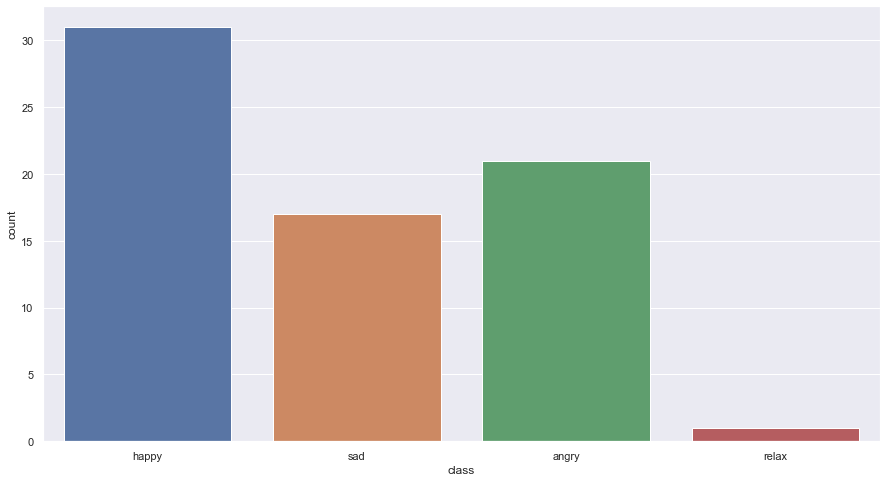

In [80]:
count4= adb_final['class']
sns.countplot(count4)

In [81]:
bg_final.to_csv('Project/bagger.csv')
svm_final.to_csv('Project/svm_def.csv')
rbf_final.to_csv('Project/svm_rbf.csv')
adb_final.to_csv('Project/adboost.csv')